11490434/11490434 [==============================] - 0s 0us/step


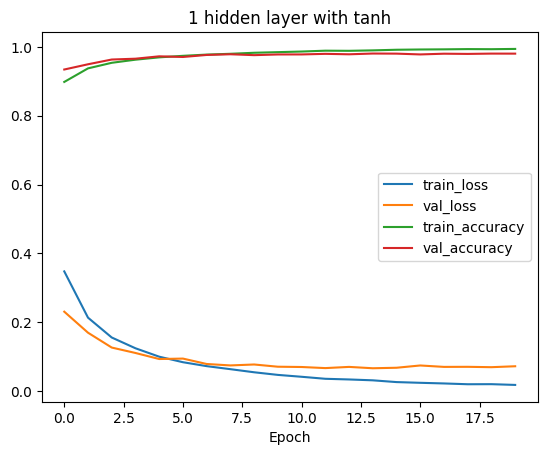

1 hidden layer with tanh - Test loss: 0.0721, Test accuracy: 0.9802


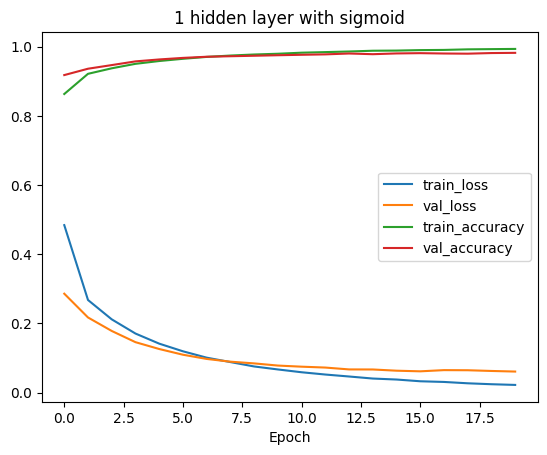

1 hidden layer with sigmoid - Test loss: 0.0606, Test accuracy: 0.9823


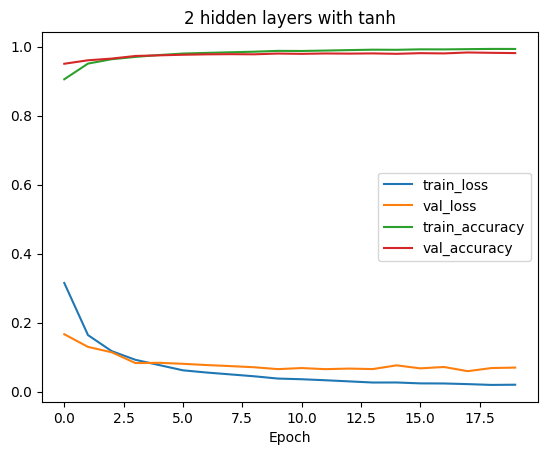

2 hidden layers with tanh - Test loss: 0.0697, Test accuracy: 0.9811


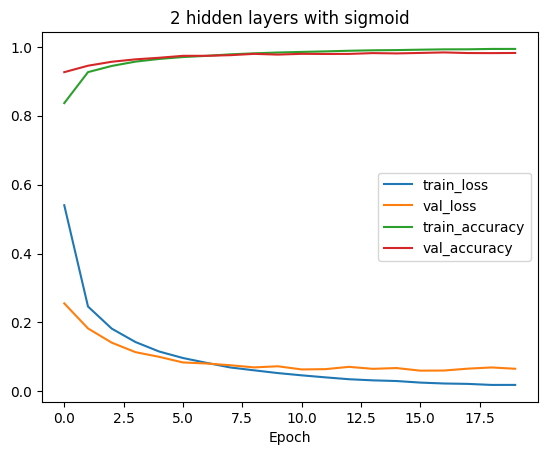

2 hidden layers with sigmoid - Test loss: 0.0655, Test accuracy: 0.9821


In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# convert class labels to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# create a list of models to train
models = []

# model with 1 hidden layer and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with tanh', model))

# model with 1 hidden layer and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with sigmoid', model))

# model with 2 hidden layers and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with tanh', model))

# model with 2 hidden layers and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with sigmoid', model))

# train each model and plot loss and accuracy curves
for name, model in models:
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),
                        epochs=20, batch_size=128, verbose=0)
    # plot loss and accuracy curves
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(name)
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    # evaluate the model on test data
    loss, accuracy = model.evaluate(x_test.reshape(-1, 784), y_test, verbose=0)
    print('{} - Test loss: {:.4f}, Test accuracy: {:.4f}'.format(name, loss, accuracy))
